In [35]:
import pandas as pd

$$\color{blue}{\text{datos de vinos}}$$

In [42]:
dff=pd.read_excel('https://github.com/darghan/unal/blob/main/vinos.xlsx?raw=true')
dff.head()

,Label,Soil,Plante,Acidity,Harmony,Intensity,Overall_quality,Typical
0,Saumur,Env1,2.000,2.107,3.143,2.857,3.393,3.250
1,Saumur,Env1,2.000,2.107,2.964,2.893,3.214,3.036
2,Bourgueuil,Env1,1.750,2.179,3.143,3.074,3.536,3.179
3,Chinon,Env2,2.304,3.179,2.038,2.462,2.464,2.250
4,Saumur,Reference,1.762,2.571,3.643,3.643,3.741,3.444


<p style="font-family: Arial; font-size:1.6em;color:blue;"> Diagrama de Cajas </p>

import matplotlib.pyplot as plt
import seaborn as sns

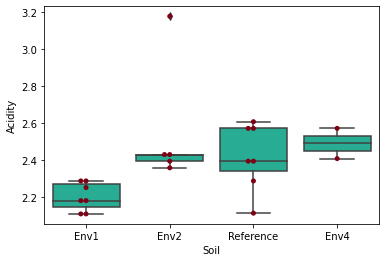

In [177]:
ax = sns.boxplot(x='Soil', y='Acidity', data=dff, color='#12c2a2')
ax = sns.swarmplot(x="Soil", y="Acidity", data=dff, color='#7d0014')
plt.show()

$$\color{blue}{\textbf{Seleccionando algunas columnas de datos}}$$

In [60]:
dff3=dff.iloc[:,[0,1,5,6]]

In [61]:
dff3.head()

,Label,Soil,Intensity,Overall_quality
0,Saumur,Env1,2.857,3.393
1,Saumur,Env1,2.893,3.214
2,Bourgueuil,Env1,3.074,3.536
3,Chinon,Env2,2.462,2.464
4,Saumur,Reference,3.643,3.741


$$\color{blue}{\textbf{Cambiando nombres de columnas}}$$

In [64]:
dff3.columns = ['tipo', 'suelo','intensidad','calidad']

In [65]:
dff3.head()

,tipo,suelo,intensidad,calidad
0,Saumur,Env1,2.857,3.393
1,Saumur,Env1,2.893,3.214
2,Bourgueuil,Env1,3.074,3.536
3,Chinon,Env2,2.462,2.464
4,Saumur,Reference,3.643,3.741


$$\color{blue}{\textbf{Diagrama de cajas en el nuevo dataframe}}$$

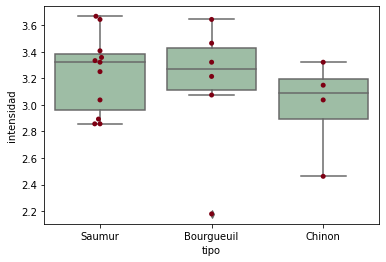

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='tipo', y='intensidad', data=dff3, color='#99c2a2')
ax = sns.swarmplot(x="tipo", y="intensidad", data=dff3, color='#7d0013')
plt.show()

$$\color{blue}{\textbf{Anova de una vía}}$$
$$\text{respuesta:intensidad; factor: tipo de vino}$$


$$\color{blue}{Ho: \mu_{t1}=\mu_{t2}=\mu_{t3}}$$

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1v = ols('intensidad ~ C(tipo)', data=dff3).fit()
anova_tab = sm.stats.anova_lm(model1v, typ=2)
anova_tab

,sum_sq,df,F,PR(>F)
C(tipo),0.180406,2.0,0.625518,0.546218
Residual,2.595689,18.0,NaN,NaN


$$\color{blue}{\textbf{Anova de una vía}}$$
$$\text{respuesta:calidad; factor: tipo de vino}$$

In [68]:
model1v2 = ols('calidad ~ C(tipo)', data=dff3).fit()
anova_tab2 = sm.stats.anova_lm(model1v2, typ=2)
anova_tab2

,sum_sq,df,F,PR(>F)
C(tipo),0.183721,2.0,0.465904,0.634927
Residual,3.548986,18.0,NaN,NaN


$$\color{blue}{\textbf{Anova de una vía: Forma alterna para extraer residuales}}$$
$$\text{respuesta:calidad; factor: tipo de suelo}$$

In [69]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=dff3, res_var='calidad', anova_model='calidad ~ C(suelo)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(suelo),3.0,1.805837,0.601946,5.310726,0.009113
Residual,17.0,1.926870,0.113345,NaN,NaN


$$\color{blue}{\textbf{Anova de una vía}}$$
$$\text{respuesta:intensidad; factor: tipo de suelo}$$

In [70]:
res2 = stat()
res2.anova_stat(df=dff3, res_var='intensidad', anova_model='intensidad ~ C(suelo)')
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(suelo),3.0,1.108341,0.369447,3.765904,0.030642
Residual,17.0,1.667754,0.098103,NaN,NaN


$$\color{blue}{\textbf{Diagrama de caja evidenciando una estructura anidada}}$$


<AxesSubplot:xlabel='suelo', ylabel='intensidad'>

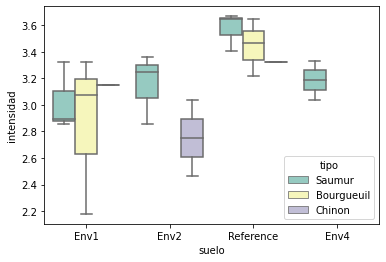

In [71]:
sns.boxplot(x="suelo", y="intensidad", hue="tipo", data=dff3, palette="Set3") 

$$\color{blue}{\textbf{Tabla cruzada evidenciando la estructura anidada}}$$

In [72]:
pd.crosstab(dff3.tipo, dff3.suelo)

suelo,Env1,Env2,Env4,Reference
tipo,,,,
Bourgueuil,3,0,0,3
Chinon,1,2,0,1
Saumur,3,3,2,3


$$\color{blue}{\textbf{Tabla de medias en la estructura anidada}}$$

In [73]:
dff3.groupby(['tipo', 'suelo']).mean()

intensidad   calidad
tipo       suelo                          
Bourgueuil Env1         2.858000  3.183000
           Reference    3.440333  3.702333
Chinon     Env1         3.148000  3.200000
           Env2         2.749500  2.964000
           Reference    3.321000  3.536000
Saumur     Env1         3.023667  3.333333
           Env2         3.154667  3.299333
           Env4         3.185000  2.747500
           Reference    3.572333  3.747000

$$\color{blue}{\textbf{Un nuevo Dataframe}}$$

In [74]:
dfc=pd.read_excel('https://github.com/darghan/unal/blob/main/Cielab_tueste_cafe.xlsx?raw=true')
dfc.head()

,L,a,b,tueste,metodo
0,15.190326,23.668751,21.964649,verde,tradicional
1,12.327745,20.777119,21.016556,verde,tradicional
2,13.532245,23.299168,23.883105,verde,tradicional
3,13.596647,21.078218,20.412357,verde,tradicional
4,13.344347,19.525299,20.695920,verde,tradicional


$$\color{blue}{\textbf{Anova de una vía o de dos vías}}$$
$$\text{respuestas:L, a, b; factor: tostación y método}$$
$$\text{Estructura cruzada}$$

In [182]:
pd.crosstab(dfc.tueste, dfc.metodo)

metodo,alterno,tradicional
tueste,,
claro,15,15
medio,15,15
oscuro,15,15
verde,15,15


$$\color{blue}{\textbf{Diagrama de cajas en estructura cruzada}}$$


<AxesSubplot:xlabel='tueste', ylabel='L'>

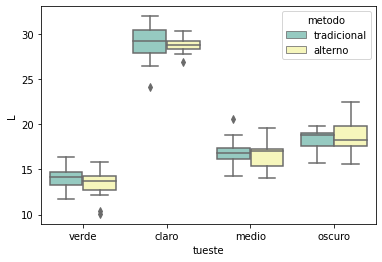

In [77]:
sns.boxplot(x="tueste", y="L", hue="metodo", data=dfc, palette="Set3") 

$$\color{blue}{\textbf{Gráfico de interacción con promedios}}$$


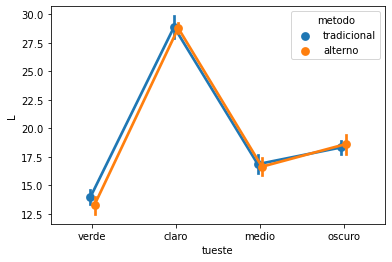

In [184]:
ax = sns.pointplot(x="tueste", y="L", hue="metodo",data=dfc, dodge=True)

$$\color{blue}{\textbf{Gráfico de interacción con medianas}}$$

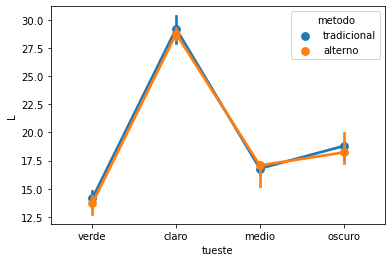

In [81]:
from numpy import median
ax = sns.pointplot(x="tueste", y="L",hue="metodo", data=dfc, estimator=median)

$$\color{blue}{\textbf{Gráfico de interacción con promedios e intervalo de confianza bootstap}}$$

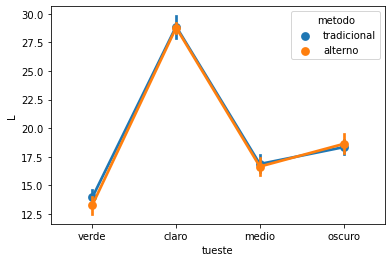

In [82]:
ax = sns.pointplot(x="tueste", y="L",hue="metodo", data=dfc, ci=95)

$$\color{blue}{\textbf{Gráfico de interacción con promedios y desviaciones estándar}}$$

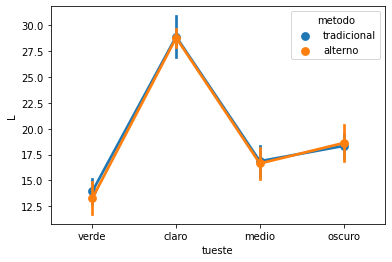

In [83]:
ax = sns.pointplot(x="tueste", y="L",hue="metodo", data=dfc, ci="sd")

$$\color{blue}{\textbf{Anova de dos vías}}$$
$$\text{respuestas:L, a, b; factor: tostación y método}$$


In [84]:
model2 = ols('L ~ C(tueste) + C(metodo) + C(tueste):C(metodo)', data=dfc).fit()
anova_tab2v = sm.stats.anova_lm(model2, typ=2)
anova_tab2v

,sum_sq,df,F,PR(>F)
C(tueste),3907.810048,3.0,567.868379,1.468503e-67
C(metodo),0.932568,1.0,0.406552,5.250262e-01
C(tueste):C(metodo),3.449178,3.0,0.501222,6.822018e-01
Residual,256.910898,112.0,NaN,NaN


$$\color{blue}{\textbf{Anova de una vía o de dos vías: forma alterna para extraer residuales en stat()}}$$


$$\color{blue}{\textbf{Modelo}}$$
$$y_{ij}=\mu+\tau_i+\beta_j+(\tau\beta)_{ij}+\epsilon_{ij}$$
$$Hipótesis$$
$$Ho_{1}: \tau_1=\tau_2=\tau_3=\tau_4=0$$
$$Ho_{2}: \beta_1=\beta_2=0$$
$$Ho_{3}: (\tau\beta)_{ij}=0;\forall{i;j} $$    

In [ ]:
from bioinfokit.analys import stat
res2v = stat()
res2v.anova_stat(df=dfc, res_var='L', anova_model='L~C(tueste)+C(metodo)+C(tueste):C(metodo)')
res2v.anova_summary

$$\color{blue}{\textbf{Comparación de medias a posteriori para el factor que rechazó su Ho}}$$


In [189]:
reshsd = stat()
# efecto principal
reshsd.tukey_hsd(df=dfc, res_var='L', xfac_var='tueste', anova_model='L~C(tueste)+C(metodo)+C(tueste):C(metodo)')
reshsd.tukey_summary

C:\Users\57316\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,verde,claro,15.209706,14.189764,16.229648,55.004625,0.001
1,verde,medio,3.122244,2.102302,4.142186,11.291333,0.001
2,verde,oscuro,4.847377,3.827435,5.867319,17.530132,0.001
3,claro,medio,12.087462,11.067520,13.107404,43.713292,0.001
4,claro,oscuro,10.362329,9.342387,11.382271,37.474493,0.001
5,medio,oscuro,1.725133,0.705191,2.745075,6.238799,0.001


$$\color{blue}{\textbf{Comparación de medias a posteriori para la interacción:innecesaria}}$$

In [190]:
reshsd.tukey_hsd(df=dfc, res_var='L', xfac_var=['tueste','metodo'], anova_model='L ~ C(tueste) + C(metodo) + C(tueste):C(metodo)')
reshsd.tukey_summary.head()

C:\Users\57316\anaconda3\lib\site-packages\bioinfokit\analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(verde, tradicional)","(verde, alterno)",0.667577,-1.040700,2.375855,1.707123,0.900
1,"(verde, tradicional)","(claro, tradicional)",14.925660,13.217382,16.633937,38.167781,0.001
2,"(verde, tradicional)","(claro, alterno)",14.826176,13.117898,16.534453,37.913381,0.001
3,"(verde, tradicional)","(medio, tradicional)",2.898881,1.190603,4.607158,7.412995,0.001
4,"(verde, tradicional)","(medio, alterno)",2.678030,0.969752,4.386308,6.848237,0.001


$$\color{blue}{\textbf{Extracción y gráfico de residuales del modelo de 2 vías}}$$

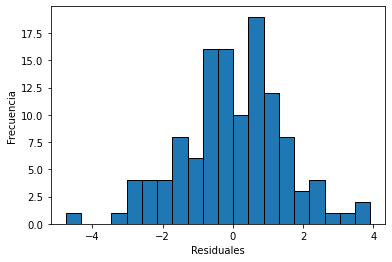

In [163]:
plt.hist(res2v.anova_model_out.resid, bins=20, histtype='bar', ec='k') 
plt.xlabel("Residuales")
plt.ylabel('Frecuencia')
plt.show()

$$\color{blue}{\textbf{prueba de Normalidad dfe residuales del modelo de 2 vías}}$$

In [164]:
import scipy.stats as stats
w, pvalue = stats.shapiro(res2v.anova_model_out.resid)
print(w, pvalue)

0.9910377264022827 0.6299136877059937


$$\color{blue}{\textbf{Histograma y densidad de residuales del modelo de 2 vías}}$$

C:\Users\57316\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


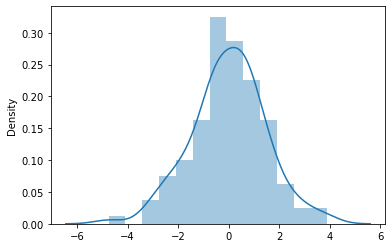

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(a=res2v.anova_model_out.resid)
plt.show()


C:\Users\57316\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

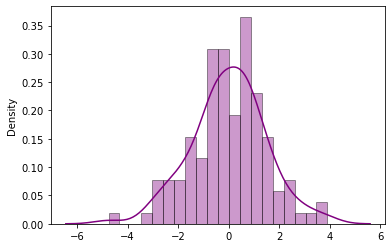

In [200]:
sns.distplot(a=res2v.anova_model_out.resid, bins=20, color='purple',
             hist_kws={"edgecolor": 'black'})

$$\color{blue}{\textbf{Transformamos para mayor ajuste a normalidad?}}$$

$$\color{blue}{\textbf{Box-cox: Datos positivos}}$$
$$f(\lambda) = \begin{cases}
  {{y^{\lambda}-1}\over{\lambda}}  & \lambda \neq{0} \\
  log{y} & \lambda =0
\end{cases}$$

In [201]:
from scipy import stats
L_t, lmbda = stats.boxcox(dfc['L'])

In [202]:
print(L_t)

[1.19957432 1.16731552 1.18231342 1.18305087 1.18012704 1.16766471
 1.21033668 1.18912331 1.15938822 1.19423856 1.17909933 1.19595255
 1.19516318 1.1926949  1.19679887 1.18438528 1.17471426 1.17293291
 1.18546155 1.18976331 1.19340146 1.1976405  1.18749055 1.16486107
 1.19079034 1.17643755 1.20568795 1.13624001 1.13109674 1.17340711
 1.27028879 1.25607148 1.27040494 1.27886094 1.26527595 1.27831191
 1.27263485 1.27722298 1.27897588 1.27773756 1.26603151 1.28235082
 1.27529311 1.27444735 1.2717614  1.27304926 1.27208635 1.27144207
 1.2731791  1.27457767 1.27436874 1.27245797 1.26999172 1.26675861
 1.27694037 1.27236122 1.27054391 1.27584311 1.27423307 1.27787483
 1.19045097 1.20873659 1.21339719 1.2147142  1.20271566 1.2074237
 1.21139927 1.22202731 1.21493578 1.23848954 1.21267496 1.21850466
 1.19586757 1.21799243 1.22802255 1.20039976 1.21790641 1.21601957
 1.19843999 1.21558921 1.20709641 1.18839589 1.2166385  1.21783019
 1.23298462 1.21623374 1.19783562 1.21146591 1.23052041 1.20312

In [203]:
print(lmbda)

-0.7142050367538869


In [204]:
print('mejor lambda = %s' % round(lmbda, 3))

mejor lambda = -0.714


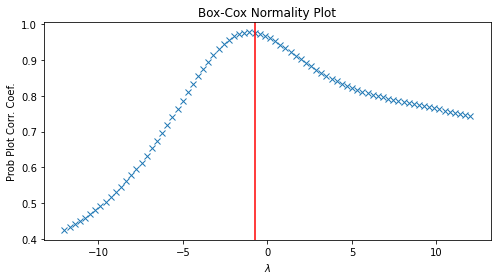

In [205]:
fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(dfc['L'], -12, 12, plot=ax)
ax.axvline(lmbda, color='r');

$$\color{blue}{\textbf{Ingresando la variable transformada al dataframe}}$$

In [206]:
dfct=dfc.assign(Lt=L_t)

In [207]:
dfct.head()

,L,a,b,tueste,metodo,Lt
0,15.190326,23.668751,21.964649,verde,tradicional,1.199574
1,12.327745,20.777119,21.016556,verde,tradicional,1.167316
2,13.532245,23.299168,23.883105,verde,tradicional,1.182313
3,13.596647,21.078218,20.412357,verde,tradicional,1.183051
4,13.344347,19.525299,20.695920,verde,tradicional,1.180127


$$\color{blue}{\textbf{Anova usando como respuesta la L transformada}}$$

In [209]:
model2t = ols('Lt ~ C(tueste) + C(metodo) + C(tueste):C(metodo)', data=dfct).fit()
anova_tab2v_t = sm.stats.anova_lm(model2t, typ=2)
anova_tab2v_t

,sum_sq,df,F,PR(>F)
C(tueste),0.129394,3.0,292.181396,8.714518e-53
C(metodo),0.000147,1.0,0.993402,3.210608e-01
C(tueste):C(metodo),0.000445,3.0,1.005509,3.931960e-01
Residual,0.016533,112.0,NaN,NaN


$$\color{blue}{\textbf{Anova alterno para extraer residuales}}$$

In [220]:
from bioinfokit.analys import stat
res2vt = stat()
res2vt.anova_stat(df=dfct, res_var='Lt', anova_model='Lt~C(tueste)+C(metodo)+C(tueste):C(metodo)')
res2vt.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(tueste),3.0,0.129394,0.043131,292.181396,8.714518e-53
C(metodo),1.0,0.000147,0.000147,0.993402,3.210608e-01
C(tueste):C(metodo),3.0,0.000445,0.000148,1.005509,3.931960e-01
Residual,112.0,0.016533,0.000148,NaN,NaN


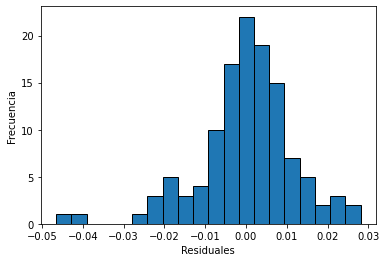

In [221]:
plt.hist(res2vt.anova_model_out.resid, bins=20, histtype='bar', ec='k') 
plt.xlabel("Residuales")
plt.ylabel('Frecuencia')
plt.show()

$$\color{blue}{\textbf{Prueba de Normalidad y nuevo Lambda}}$$

In [222]:
import scipy.stats as stats
wt, pvaluet = stats.shapiro(res2vt.anova_model_out.resid)
print(wt, pvaluet)

0.950151801109314 0.00022167911811266094


In [223]:
from scipy import stats
L_tt, lmbdat = stats.boxcox(dfct['Lt'])

In [224]:
print('mejor lambda = %s' % round(lmbdat, 3))

mejor lambda = 0.151
